In [1]:
"""Machine Learning
This deals with algorithms. Algorithms are models that help computer to learn and predict.
Applications of ML
-Supervised learning:This deals with labelled data eg linear regression, decision trees, support vector machine, neural networks.
-Unsupervised learning:Uses unlabelled data eg clustering(k-means clustering, hierachical, Principal Component Analysis(PCA)) to group data together.
-Reinforcement learning: deals with signals.
Steps in ML
-Define the problem
-Is it a ML problem (Does it require classification, regression, clustering, anomaly detection)
-Gather the data
-Split the data
Datatypes
Categories of data
1. Numerical data: continous(infinite)
2.categorical: distint groups or categories eg nominal data( has no inherent order of ranking eg male and female, colors-red, blue and green)
ordinal: type of categorical data that has a natural order of ranking eg educaional levels-high school, degree, masters
"""

'Machine Learning\nThis deals with algorithms. Algorithms are models that help computer to learn and predict.\nApplications of ML\n-Supervised learning:This deals with labelled data eg linear regression, decision trees, support vector machine, neural networks.\n-Unsupervised learning:Uses unlabelled data eg clustering(k-means clustering, hierachical, Principal Component Analysis(PCA)) to group data together.\n-Reinforcement learning: deals with signals.\nSteps in ML\n-Define the problem\n-Is it a ML problem (Does it require classification, regression, clustering, anomaly detection)\n-Gather the data\n-Split the data\nDatatypes\nCategories of data\n1. Numerical data: continous(infinite)\n2.categorical: distint groups or categories eg nominal data( has no inherent order of ranking eg male and female, colors-red, blue and green)\nordinal: type of categorical data that has a natural order of ranking eg educaional levels-high school, degree, masters\n'

In [3]:
#checking for scikit learn
#pip show scikit-learn

In [13]:
#importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#ML for regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
#control dispaly
pd.options.display.max_columns=50
#sns.set(style="darkgrid", rc={'axes.facecolor':'#DCDCDC'})

In [3]:
#reading the dataset
df=pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
"""cp-chest pain
trestbps-resting blood pressure
chol-cholestral
fbs-fasting blood sugar
restecg-resting electrocardiography
exang-exercise induced agina
oldpeak-ST depression induced
slope- slope of peak exercise
ca-number of major vessels
thal-normal, fexied defect, reversible defect
target-(0-no heart disease, 1-has heart disease)
sex-(1-male, 2-female)
"""

'cp-chest pain\ntrestbps-resting blood pressure\nchol-cholestral\nfbs-fasting blood sugar\nrestecg-resting electrocardiography\nexang-exercise induced agina\noldpeak-ST depression induced\nslope- slope of peak exercise\nca-number of major vessels\nthal-normal, fexied defect, reversible defect\ntarget-(0-no heart disease, 1-has heart disease)\nsex-(1-male, 2-female)\n'

In [6]:
#showing the number of people with or without heart disease
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [7]:
#show percentage of male and female
count_female=len(df[df.sex==0])
count_male=len(df[df.sex==1])
#show output, % is for formatting float values, .2 specifies no. of decimal places
print("Percentage of female: {:.2f}%".format(count_female/(len(df.sex))*100))
print("Percentage of male: {:.2f}%".format(count_male/(len(df.sex))*100))

Percentage of female: 30.44%
Percentage of male: 69.56%


In [8]:
#finding mean of each column using the target column
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


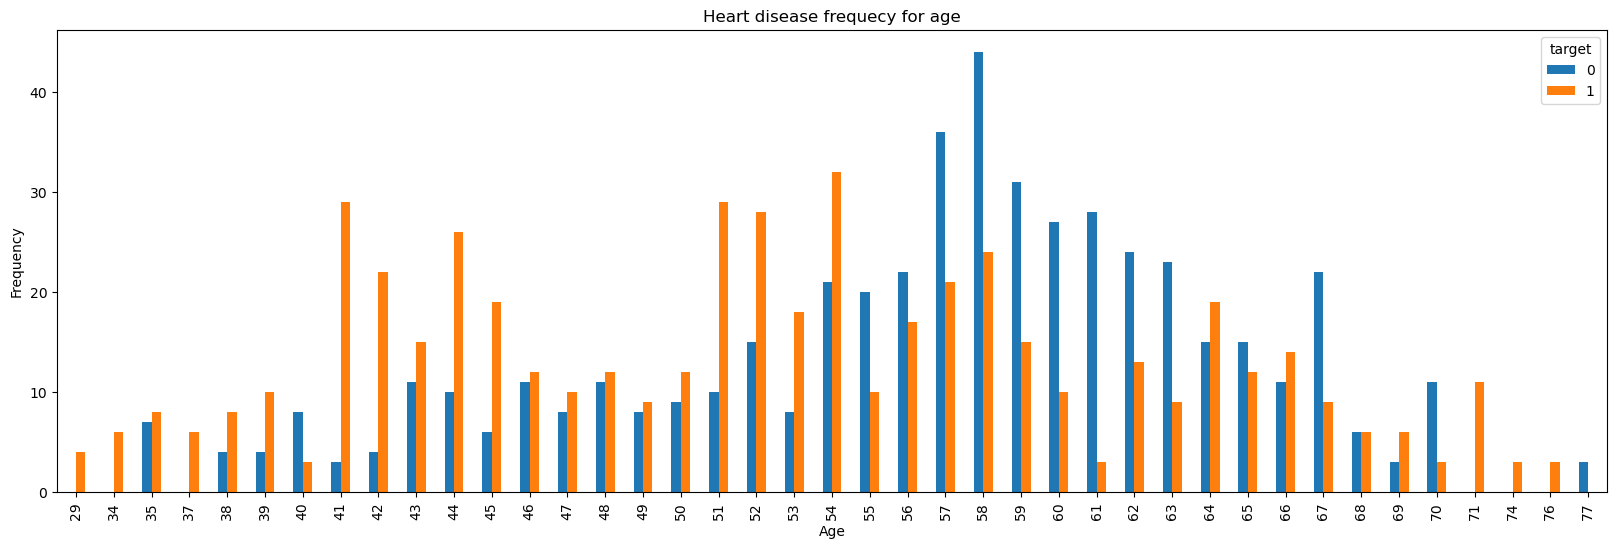

In [9]:
#barplot showing frequency of herat disease with age
pd.crosstab(df.age,df.target).plot(kind='bar', figsize=(20,6))
plt.title("Heart disease frequecy for age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


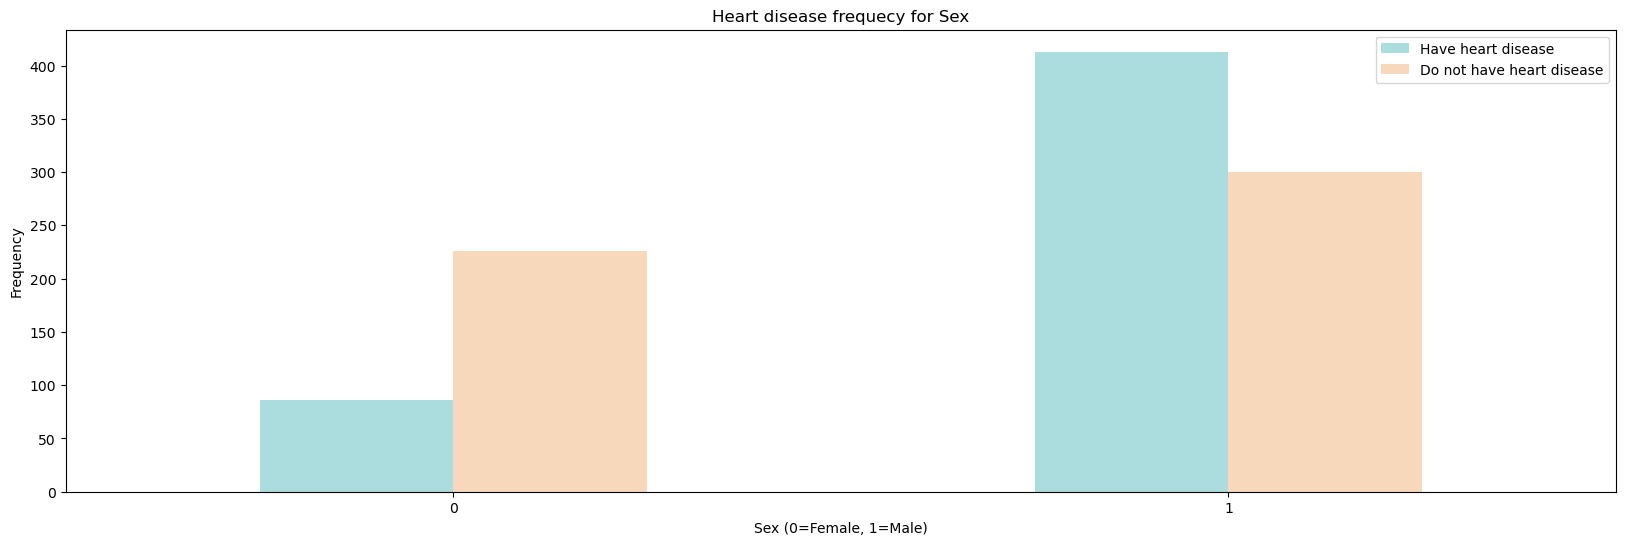

In [10]:
#heart disease frequency for sex
pd.crosstab(df.sex,df.target).plot(kind='bar', figsize=(20,6),color=['#ACDDDE', '#F7D8BA'])
plt.title("Heart disease frequecy for Sex")
plt.xlabel("Sex (0=Female, 1=Male)")
plt.legend(['Have heart disease', 'Do not have heart disease'])
plt.xticks(rotation=0)
plt.ylabel("Frequency")
plt.show()


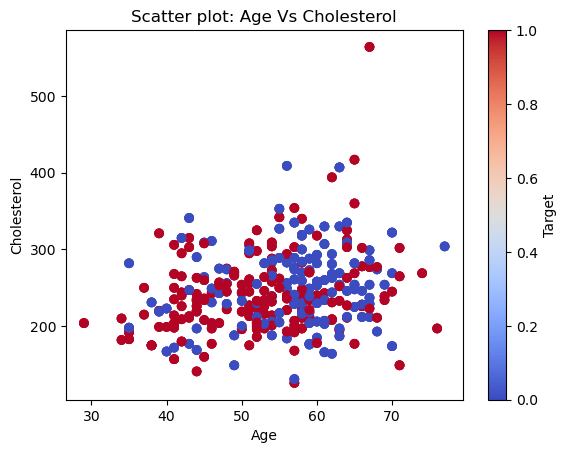

In [11]:
#scatter plot for age and cholestoral
age=df["age"]
chol=df["chol"]
plt.scatter(age, chol,c=df['target'], cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title("Scatter plot: Age Vs Cholesterol")
plt.colorbar(label='Target')
plt.show()

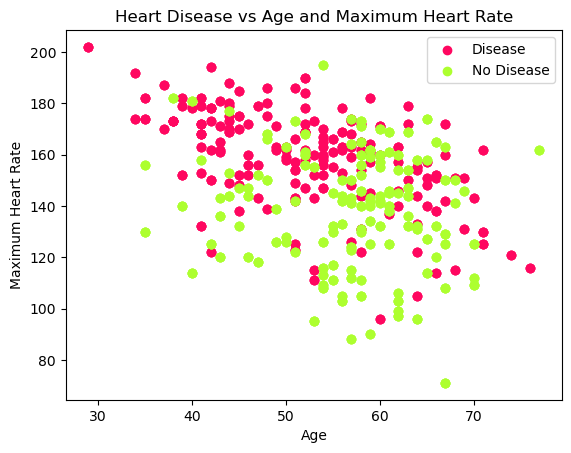

In [14]:
#scatter plot for heart disease vs Age and Maximum Heart Rate
plt.scatter(x=df.age[df.target==1], y=df.thalach[df.target==1], c='#FF0760', label='Disease')
plt.scatter(x=df.age[df.target==0], y=df.thalach[df.target==0], c='#ADFF2F', label='No Disease')
#adding a legend
plt.legend()
#adding labels to the axes
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
#setting title
plt.title('Heart Disease vs Age and Maximum Heart Rate')
#showing the plot
plt.show()



In [16]:
#logistic regression model
#Logistic regression is a supervised learning model used for classification where the goal is to predict the probability that an instance belongs to a particula class or not.
#It is reffered to as regression because it takes i input from linear regression
#creating depedent and indepedent variables
y=df.target.values #depedant(our goal)
x_data=df.drop(['target'], axis=1)  #indepedent

In [17]:
#normalizing data, min-max scaling to ensure that the features contribute equally hence improving performance of the algorithm
#normalisation scales data to a specific range between 1 and 0
#Subtracting the minimum value of the feature and dividing it by the difference between the maximum and minimum values
x= (x_data-np.min(x_data)) / (np.max(x_data)-np.min(x_data))

In [18]:
#determing shape of the indepedent variables
x.shape


(1025, 13)

In [19]:
#determing shape of the depedent variables(target)
y.shape


(1025,)

In [20]:
#splitting it into training and testing data
# 80% training, 20% testing
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [21]:
#transpose matrices.
#transposing is changing the features(columns) of the dataset to be the rows while the data(rows to be the columns)
#transposing helps in model optimisation, feature scaling and interpreting the learned coefficients.
x_train= x_train.T
y_train=y_train.T
x_test=x_test.T
y_test=y_test.T


In [45]:
#fitting a logistic regression model
clf=LogisticRegression(random_state=0)
clf.fit(x_train.T, y_train.T)
#prediction
y_pred_lr=clf.predict(x_test.T)
y_pred_lr

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [46]:
#determining accuracy of the model
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test.T, y_pred_lr)
print("Logistic regression accuracy in %:" ,acc*100)

Logistic regression accuracy in %: 85.85365853658537


In [47]:
#decision trees: used for both classification and regression
#It is a tree structured classifier where internal nodes represent the features of a dataset, branches represent the decision rules and each leafnode represents the outcome
#pros:easy to understand, captures non linear relationships, can handle missing values and outliers
#cons:prone to overfitting, sensitive to small changes, may not work well with noisy data(data that is corrupted, inconsistent, irrelevant features, outliers, nulls etc)
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0) #gini impurity is the measure of the impurity or randomness of the data at a node.the decision tree aims ar minimizing the ginin impurity 
dt.fit(x_train.T, y_train.T)
y_pred_dt=dt.predict(x_test.T)
#determing accuracy 
acc=accuracy_score(y_test.T, y_pred_dt)
print("Decision tree accuracy in %:" ,acc*100)

    


Decision tree accuracy in %: 84.39024390243902


In [48]:
#using KNN (K Nearest Neighbor):supervised learning algorithm used for both classification and regression.
#It assumes the similarity between the new case/data and available cases and puts the new case into a category that is most similar to the available categories
#Pros:simple, robust to noisy training data, more effective if training data is  large
#Cons: always required to determine value of k, high computstion cost
#importing KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)  #required number of neighbors is 5, metric decides the distance between the points,2 is the equivalent to the standard Euclidean distance
#fitting the model
knn.fit(x_train.T,y_train.T)
#predicting
y_pred_knn=knn.predict(x_test.T)
#determing accuracy 
acc=accuracy_score(y_test.T, y_pred_knn)
print("KNN accuracy in %:" ,acc*100)



KNN accuracy in %: 85.85365853658537


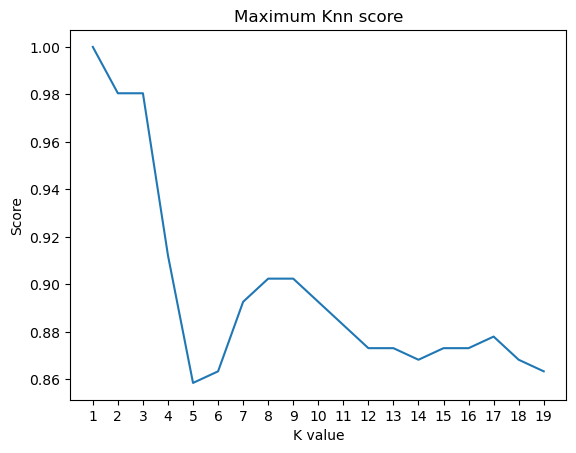

Maximum KNN score is 100.00


In [32]:
#getting maximum KNN score for the model
score_list=[]
for i in range(1,20):
    knn2=KNeighborsClassifier(n_neighbors=i) #k is the number of neighbors to be checked
    knn2.fit(x_train.T, y_train.T)
    score_list.append(knn2.score(x_test.T, y_test.T))
#show using line plot
plt.plot(range(1,20), score_list)
plt.xticks(np.arange(1,20,1))
plt.xlabel('K value')
plt.ylabel('Score')
plt.title('Maximum Knn score')
plt.show()
#geting maximum Knn score for the model
accuracies={}
acc=max(score_list)*100
accuracies['KNN']=acc
print("Maximum KNN score is {:.2f}".format(acc))

In [49]:
#Random forest model: Cn be used for both regression and classification
#This is a classifier that contains a number of decision trees on varipus subsets of the given dataset and takes the average to improve the predictive accuracy of the dataset
#Pros: Handles large datasets with high dimensionality, enhances model accuracy and prevents over fitting
#Con: more suitable for regression tasks
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,criterion="entropy")  #required number of treees is 10, criterion is function to analyze the accuracy of the split(entropy is for information gai)
rf.fit(x_train.T, y_train.T)
#predicting
y_pred_rf=rf.predict(x_test.T)
#determing accuracy 
acc=accuracy_score(y_test.T, y_pred_rf)
print("Random forest accuracy in %:" ,acc*100)





Random forest accuracy in %: 100.0


In [50]:
#Support vector machine:used for both classification and regression
#the goal of SVM is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.
from sklearn.svm import SVC
svc=SVC(kernel='linear',random_state=0)  #the kernel parameter is used to specify the type of kernel function to be used for mapping the input data into a higher dimensional feature space. the linear kernel represnts a linear transformatio of the input data.
svc.fit(x_train.T,y_train.T)
y_pred_svc=svc.predict(x_test.T)
#determing accuracy 
acc=accuracy_score(y_test.T, y_pred_svc)
print("Support Vector Machine accuracy in %:" ,acc*100)


Support Vector Machine accuracy in %: 86.34146341463415


In [51]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train.T, y_train.T)
y_pred_nb=nb.predict(x_test.T)
#determing accuracy 
acc=accuracy_score( y_test.T,y_pred_nb)
print("Naive Bayes accuracy in %:" ,acc*100)



Naive Bayes accuracy in %: 85.36585365853658


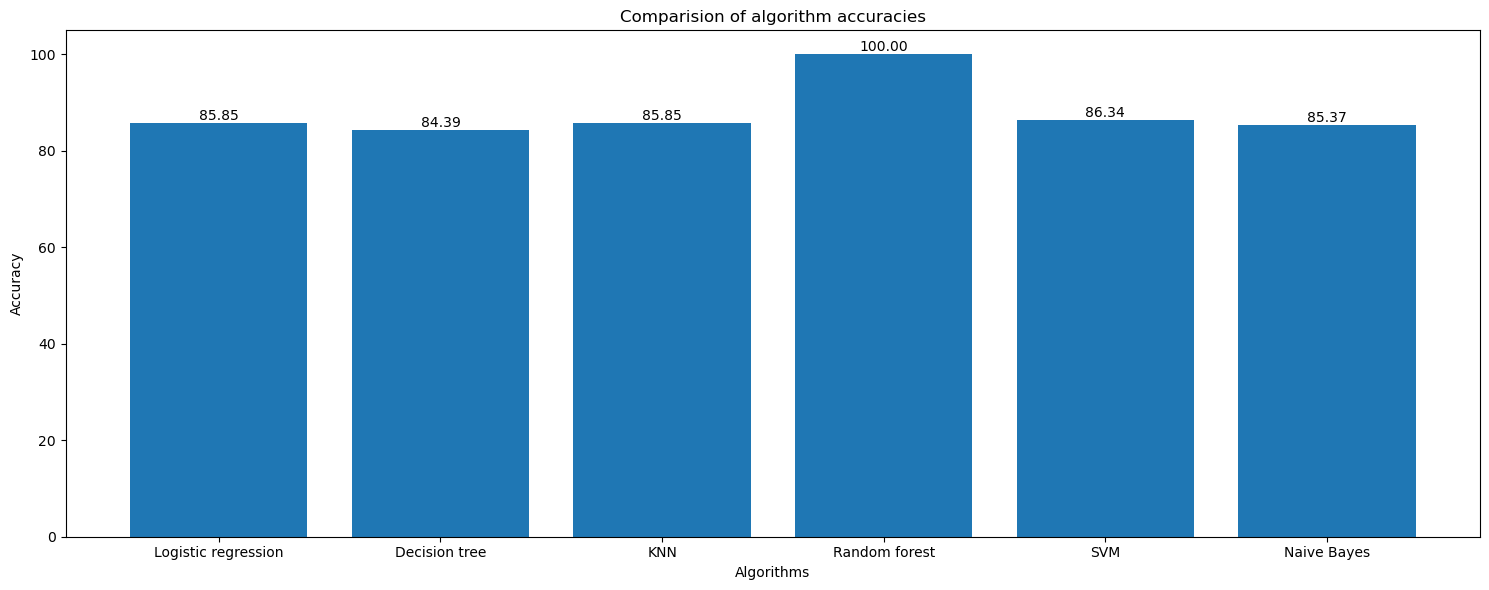

In [40]:
#barplot to compare accuracy of the algorithms
algorithms=['Logistic regression','Decision tree','KNN','Random forest','SVM','Naive Bayes']
accuracy_scores=[85.85365853658537,84.39024390243902,85.85365853658537,100.0,86.34146341463415,85.36585365853658]
plt.figure(figsize=(15,6))
x_pos=range(len(algorithms))
bars=plt.bar(x_pos, accuracy_scores)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparision of algorithm accuracies')
plt.xticks(x_pos, algorithms)
#adding data labels on bars
for bar, accuracy in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),f'{accuracy:.2f}',ha='center', va='bottom')
plt.tight_layout()
plt.show()


In [53]:
#determining confusion matrices of all models
from sklearn.metrics import confusion_matrix
cm_lr=confusion_matrix(y_test.T, y_pred_lr)
cm_dt=confusion_matrix(y_test.T, y_pred_dt)
cm_knn=confusion_matrix(y_test.T, y_pred_knn)
cm_rf=confusion_matrix(y_test.T, y_pred_rf)
cm_svc=confusion_matrix(y_test.T, y_pred_svc)
cm_nb=confusion_matrix(y_test.T, y_pred_nb)






<Axes: title={'center': 'Naive Bayes Confusion Matrix'}>

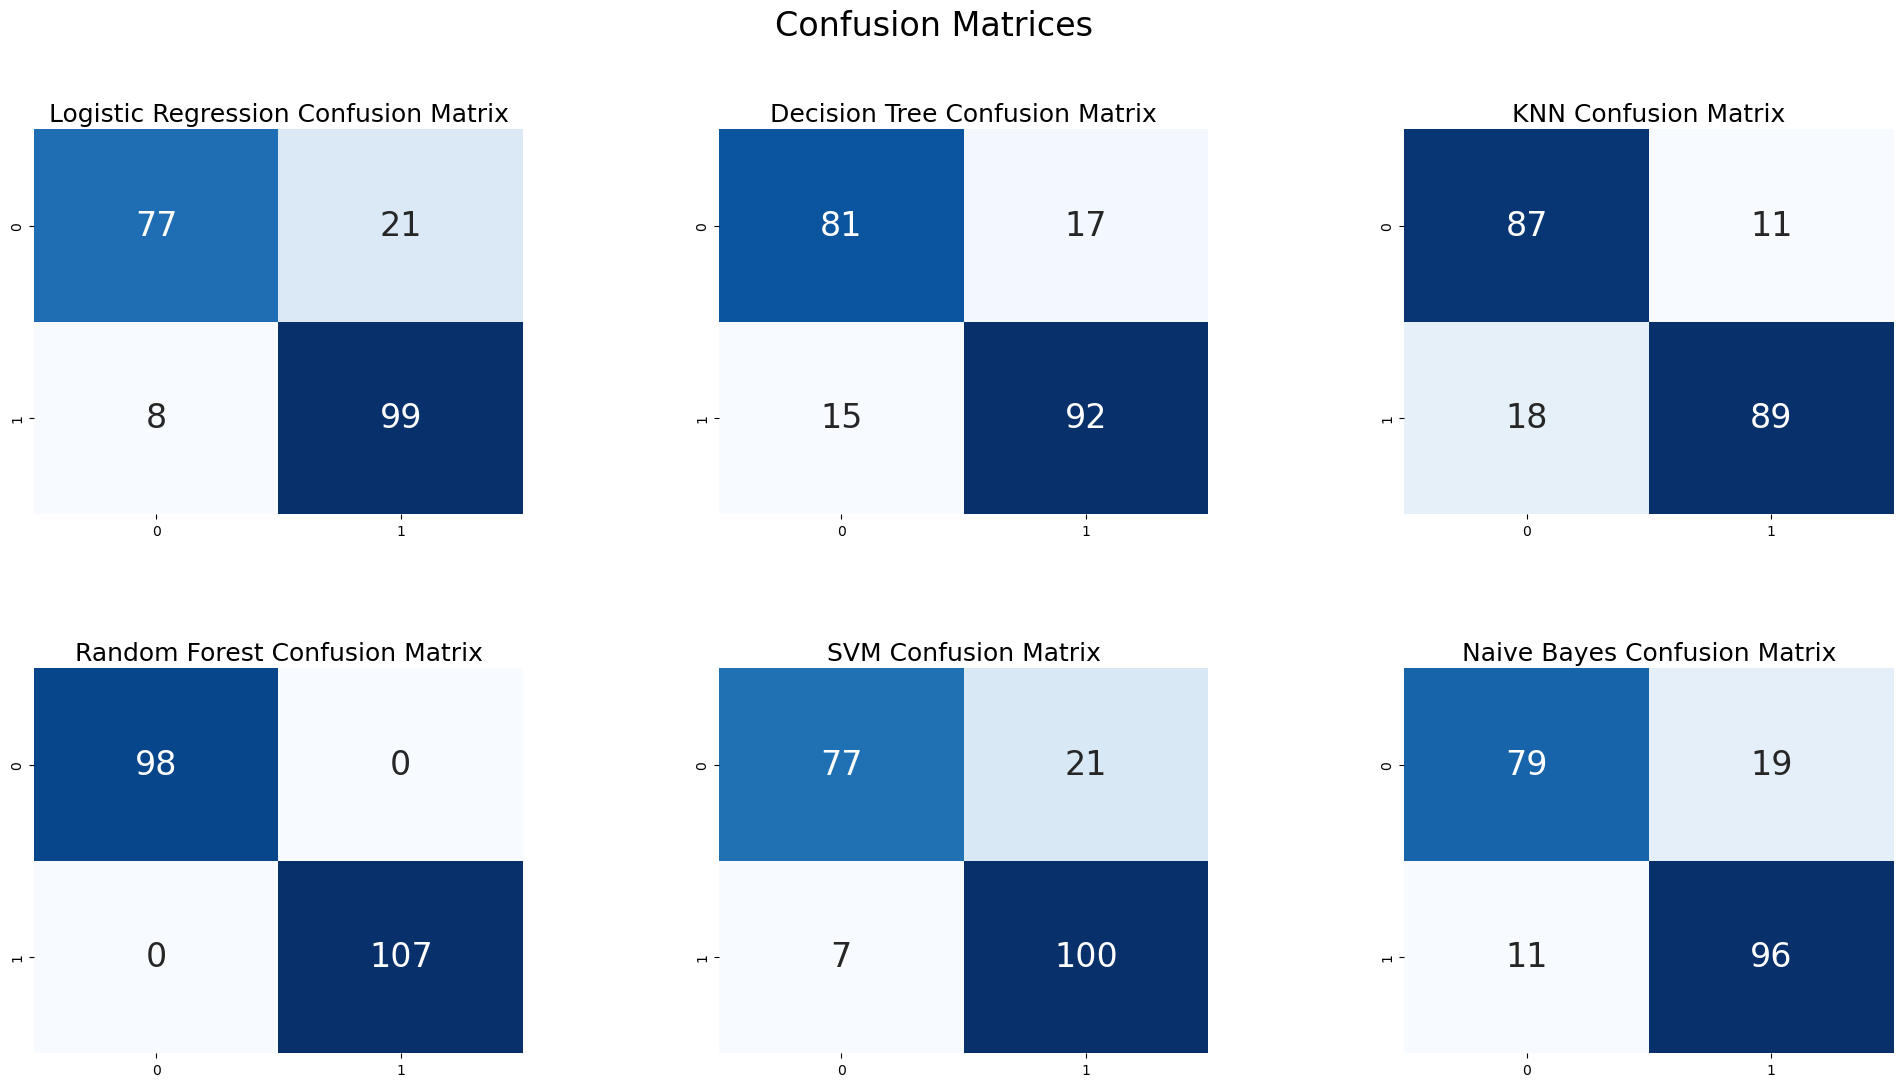

In [58]:
#plotting confusion matrices for all algorithms using heatmaps
plt.figure(figsize=(24,12))
plt.suptitle("Confusion Matrices",fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
#Heatmap for Logistic Regression confusion matrix
plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix",fontsize=18)
sns.heatmap(cm_lr,annot=True, cmap="Blues",fmt="d",cbar=False, annot_kws={"size":24})
#this shows that the model made 176 (77+99) correct predictions and 29 (21+8) wrong predictions.
#TP(True Positives)-77, TN(True Negatives)-99, FN(False Negatives)-21, FP(False Positives)-8
#other evaluation matrices that can be calculated from confusion matrix include recall, precision, specificity and f1-score
#precision=TP/(TP+FP), Recall=TP/(TP+FN), Specificity=TN/(TN+FP), F1-score=2*(precision*recall)/(precision+recall)
#Heatmap for Decision Tree confusion matrix
plt.subplot(2,3,2)
plt.title("Decision Tree Confusion Matrix",fontsize=18)
sns.heatmap(cm_dt,annot=True, cmap="Blues",fmt="d",cbar=False, annot_kws={"size":24})
#Heatmap for KNN confusion matrix
plt.subplot(2,3,3)
plt.title("KNN Confusion Matrix",fontsize=18)
sns.heatmap(cm_knn,annot=True, cmap="Blues",fmt="d",cbar=False, annot_kws={"size":24})
#Heatmap for Random Forest confusion matrix
plt.subplot(2,3,4)
plt.title("Random Forest Confusion Matrix",fontsize=18)
sns.heatmap(cm_rf,annot=True, cmap="Blues",fmt="d",cbar=False, annot_kws={"size":24})
#Heatmap for SVM confusion matrix
plt.subplot(2,3,5)
plt.title("SVM Confusion Matrix",fontsize=18)
sns.heatmap(cm_svc,annot=True, cmap="Blues",fmt="d",cbar=False, annot_kws={"size":24})
#Heatmap for Naive Bayes confusion matrix
plt.subplot(2,3,6)
plt.title("Naive Bayes Confusion Matrix",fontsize=18)
sns.heatmap(cm_nb,annot=True, cmap="Blues",fmt="d",cbar=False, annot_kws={"size":24})


